# Pendulum

다음처럼 주어지는 진자의 운동방정식을 풀어라.
$$ \frac{d^2 \theta}{dt^2} + \beta \frac{d \theta}{dt} + \frac{g}{L} \sin \theta = 0. $$ 
$\beta$는 마찰의 세기, $L$은 진자의 길이, $g$는 중력가속도이다. 흔히 작은 $\theta$를 가정하고 
$\sin\theta \approx \theta$ 근사를 이용하여 해석적인 해를 구한다. 
여기에서는 $\sin \theta$를 직접 이용하여 수치해를 구해보자.  

2차 미분방정식을 2개의 1차 미분방정식으로 분리하자.
$$ \frac{d\theta}{dt} = w, \\
\frac{d w}{dt} = - \beta w - \frac{g}{L} \sin \theta . $$ 

초기 상태는 $\theta_0 = 1, w_0 =0$이며 $\beta=0.1, \frac{g}{L}=1$을 가정하고 운동의 해를 구해보자. scipy.integrate.odeint를 포함하여 어떤 방법을 이용하여도 된다.

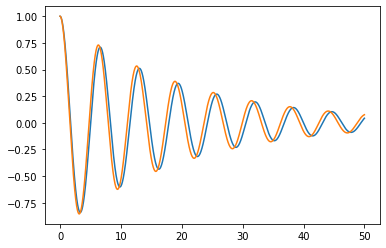

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

b, w=0.1, 1
state0 = [1.0, 0.0]
t = np.arange(0.0, 50.0, 0.01)

def f(state, t):
    x, v = state 
    return v, -b*v-w**2*np.sin(x) # derivatives
def g(state, t):
    x, v = state 
    return v, -b*v-w**2*x # derivatives

states = odeint(f, state0, t)
states2 = odeint(g, state0, t)
plt.plot(t,states[:,0],t,states2[:,0]);

# SIR Model and Basic Reproduction Number

전염확산 모형 중 하나인 SIR 모형을 살펴보자. SIR 모형은 Susceptible (S), Infectious (I), Recovered (R), 세 가지 상태로 구성된 모형이며 잘 섞여있는 인구에 대해서 이 모형은 동역학은 다음의 방정식으로 주어진다.

$$ \frac{dS}{dt} = -\frac{\beta I S}{N}, \\
\frac{dI}{dt} = \frac{\beta I S}{N} - \gamma I, \\
\frac{dR}{dt} = \gamma I. $$
여기에서 $\beta$는 단위 시간, 단위 인구 당평균 감염 횟수이며, $\gamma$는 평균 치료 비율이다. $S$, $I$, $R$은 각각 미감염자(S), 감염자(I), 완치자(R)의 수이며 $N$은 총 인구수이다. $S(t)+I(t)+R(t)=N$이다. 

$I$를 다시 정리하면
$$\frac{dI}{dt} = \frac{\beta I S}{N} - \gamma I =\left( \frac{1}{\gamma I} \frac{\beta I S}{N} -1 \right) \gamma I =\left( \frac{\beta}{\gamma} \frac{S}{N} -1 \right) \gamma I. $$
기본감염재생수(Basic Reproduction Number)를 $R_0=\frac{\beta}{\gamma}$로 정의하면  
$$\frac{dI}{dt} = \left( R_0 \frac{S}{N} -1 \right) \gamma I. $$
즉 $R_0>1$이면 $\frac{dI}{dt} >0$, $R_0<1$이면 $\frac{dI}{dt} <0$이다.

* 참조 : https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#Bio-mathematical_deterministic_treatment_of_the_SIR_model

$$ \frac{dS}{dt} = -\frac{\beta I S}{N}, \\
\frac{dI}{dt} = \frac{\beta I S}{N} - \gamma I, \\
\frac{dR}{dt} = \gamma I. $$

위의 주어진 식의 수치해를 구하여라. 
$$N=1000, S=999, I=1, \gamma=1$$을 가정하며
$\beta$가 $\gamma$보다 클 때 또 작을 때 동역학의 결과를 비교하여라.

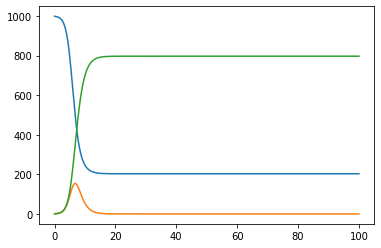

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

N, g, b = 1000.0, 1.0, 2.0
def f(state, t):
    S, I, R = state  
    return -b*I*S/N, b*I*S/N - g*I, g*I 

state0 = [999.0, 1.0, 0.0]
t = np.arange(0.0, 100.0, 0.01)
states = odeint(f, state0, t)
plt.plot(t,states[:,0],t,states[:,1],t,states[:,2]);

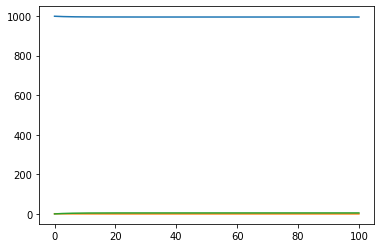

In [9]:
b=0.8
states = odeint(f, state0, t)
plt.plot(t,states[:,0],t,states[:,1],t,states[:,2]);